In [1]:
import pandas as pd
import pylab
import seaborn as sns
import matplotlib.pyplot as plt
# make the plots a little wider by default
%matplotlib inline
plt.style.use('ggplot')

In [2]:
from google.colab import files

df = files.upload()

Saving data_project.csv to data_project.csv


In [3]:
df1 = pd.read_csv('data_project.csv')
df1.head()

,State,Income,Percentage of the population who is food insecure (1),Unemployment rate in 2019 (%),"Rate of COVID-19 cases per 100,000 people (Nov 11 2020)",Deviation from average,Percentage of the population who is food insecure in %,Unnamed: 7,Unnamed: 8
0,Alabama,56200.0,0.139,3.0,4213.0,4213.0,13.9,NaN,NaN
1,Alaska,78394.0,0.107,6.1,2848.0,2848.0,10.7,NaN,NaN
2,Arizona,70674.0,0.117,4.7,3615.0,3615.0,11.7,NaN,NaN
3,Arkansas,54539.0,0.138,3.5,4117.0,4117.0,13.8,NaN,NaN
4,California,78105.0,0.099,4.0,2508.0,2508.0,9.9,NaN,NaN


In [4]:
#we want to delete the unnamed column with no value inside
df1 = df1.loc[:, ~df1.columns.str.contains('^Unnamed')] #this piece of code is from 'https://www.codegrepper.com/code-examples/delphi/how+to+delete+Unnamed%3A+0+pandas'
df1.head()

,State,Income,Percentage of the population who is food insecure (1),Unemployment rate in 2019 (%),"Rate of COVID-19 cases per 100,000 people (Nov 11 2020)",Deviation from average,Percentage of the population who is food insecure in %
0,Alabama,56200.0,0.139,3.0,4213.0,4213.0,13.9
1,Alaska,78394.0,0.107,6.1,2848.0,2848.0,10.7
2,Arizona,70674.0,0.117,4.7,3615.0,3615.0,11.7
3,Arkansas,54539.0,0.138,3.5,4117.0,4117.0,13.8
4,California,78105.0,0.099,4.0,2508.0,2508.0,9.9


In [5]:
df1['Income'].describe()

count       52.00000
mean     69700.50000
std      11600.77053
min      44787.00000
25%      61018.50000
50%      69367.00000
75%      75336.00000
max      95572.00000
Name: Income, dtype: float64

In [6]:
df1['Rate of COVID-19 cases per 100,000 people (Nov 11 2020)'].describe()

count       52.000000
mean      5060.134615
std      13398.465814
min        395.000000
25%       2495.000000
50%       3344.000000
75%       4054.750000
max      99356.000000
Name: Rate of COVID-19 cases per 100,000 people (Nov 11 2020), dtype: float64

In [7]:
df1['Percentage of the population who is food insecure in %'].describe()

count    52.000000
mean     11.148077
std       2.135920
min       6.600000
25%       9.900000
50%      10.800000
75%      12.525000
max      15.700000
Name: Percentage of the population who is food insecure in %, dtype: float64

Text(0.5, 1.0, 'Rate of Covid-19 cases per 100,000 people')

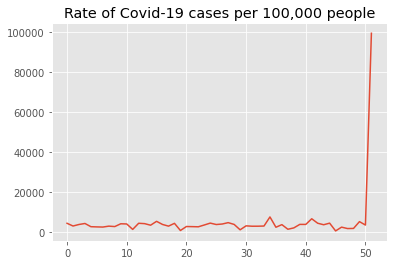

In [8]:
df1['Rate of COVID-19 cases per 100,000 people (Nov 11 2020)'].plot()
plt.title('Rate of Covid-19 cases per 100,000 people')

Text(0.5, 1.0, 'Influence of food insecurity on the number of covid-19 cases')

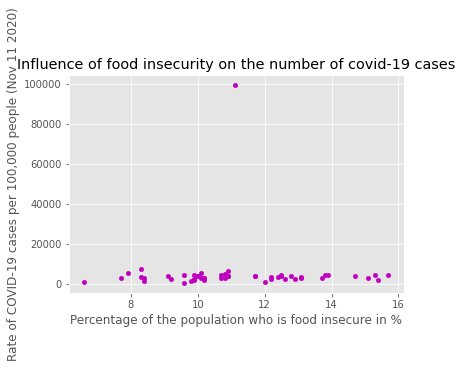

In [9]:
df1.plot(y='Rate of COVID-19 cases per 100,000 people (Nov 11 2020)', x='Percentage of the population who is food insecure in %', kind='scatter', color='m')
plt.title('Influence of food insecurity on the number of covid-19 cases')

Code analysis 

Literature review analysis 

No boxplots 

Scatter plots to compare variables together

Policies / SNAP (data analysis and putting it back into context)





In [10]:
x_values = df1['Rate of COVID-19 cases per 100,000 people (Nov 11 2020)']
y_values = df1['Percentage of the population who is food insecure in %']

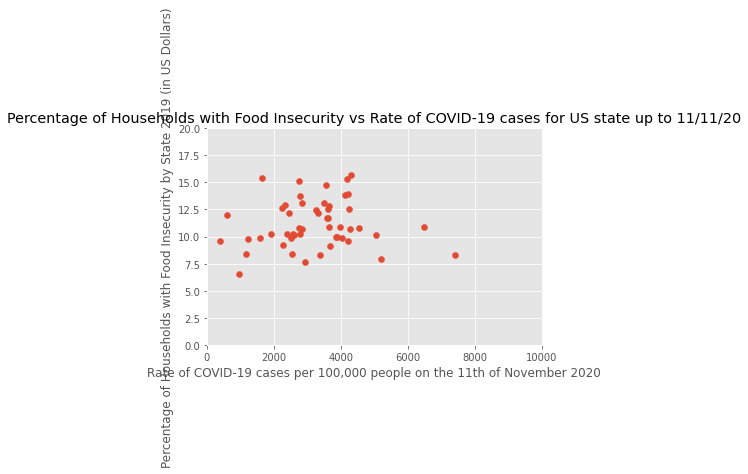

In [11]:
plt.scatter(x_values, y_values)
plt.xlim(0, 10000)
plt.ylim(0, 20)
plt.xlabel("Rate of COVID-19 cases per 100,000 people on the 11th of November 2020") #change axis labels
plt.ylabel("Percentage of Households with Food Insecurity by State 2019 (in US Dollars)")
plt.title("Percentage of Households with Food Insecurity vs Rate of COVID-19 cases for US state up to 11/11/20")

#if you wanna save this as a png image, it will appear in the documents tab on the left
plt.savefig('covid-19 vs food insecurity', dpi=100)

In [12]:
#we want to make a histogram to display the level of food insecurity for each state in the US 
state_data = df1['State'][0:51]

food_data = df1['Percentage of the population who is food insecure in %'][0:51]

income_data = df1['Income'][0:51]

covid_data = df1['Rate of COVID-19 cases per 100,000 people (Nov 11 2020)'][0:51]

global_data = {"States": state_data, "Level of food insecurity in %": food_data}

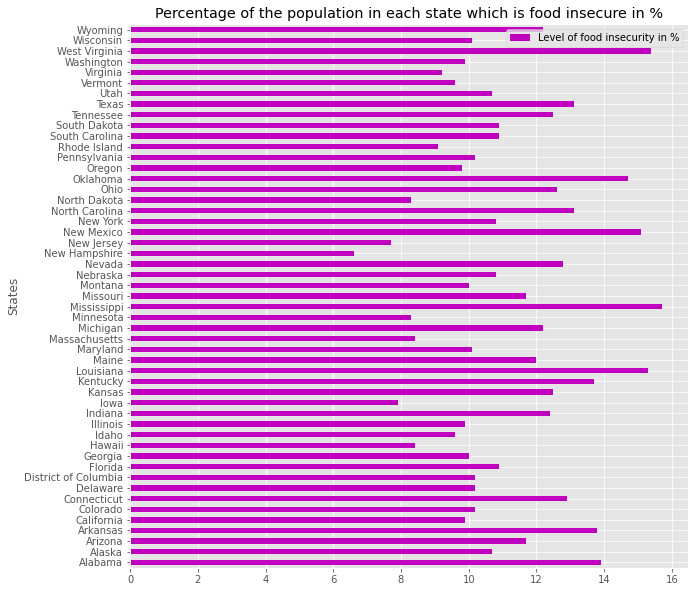

In [13]:
df2 = pd.DataFrame(data = global_data)

df2.plot.barh(x='States', y='Level of food insecurity in %', title='Percentage of the population in each state which is food insecure in %', color='m', figsize=(10,10))

#we used this link https://pythontic.com/pandas/dataframe-plotting/bar%20chart 

Text(0.5, 1.0, 'Percentage of population in each state which is food insecure')

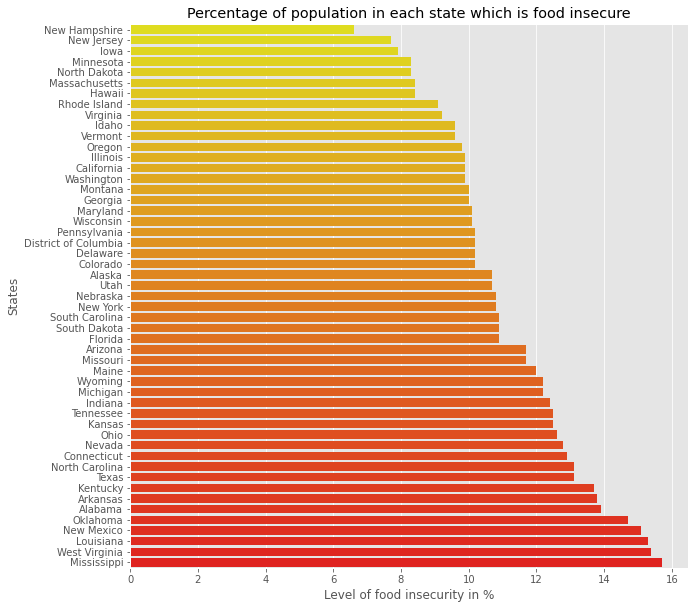

In [14]:
global_data_1 = pd.DataFrame(global_data) #we transform the global_data into a pandas dataframe 

plt.figure(figsize=(10,10))

sns.barplot(y='States', x='Level of food insecurity in %', data=global_data_1, palette='autumn_r', saturation=0.75, order=global_data_1.sort_values('Level of food insecurity in %').States)

plt.title('Percentage of population in each state which is food insecure')

# we used this link: https://datavizpyr.com/sort-bars-in-barplot-using-seaborn-in-python/

In [15]:
global_data_1.sort_values('Level of food insecurity in %', ignore_index=True).head()

,States,Level of food insecurity in %
0,New Hampshire,6.6
1,New Jersey,7.7
2,Iowa,7.9
3,Minnesota,8.3
4,North Dakota,8.3


Text(0.5, 1.0, 'Level of income VS Food insecurity and the number of COVID-19 cases per state')

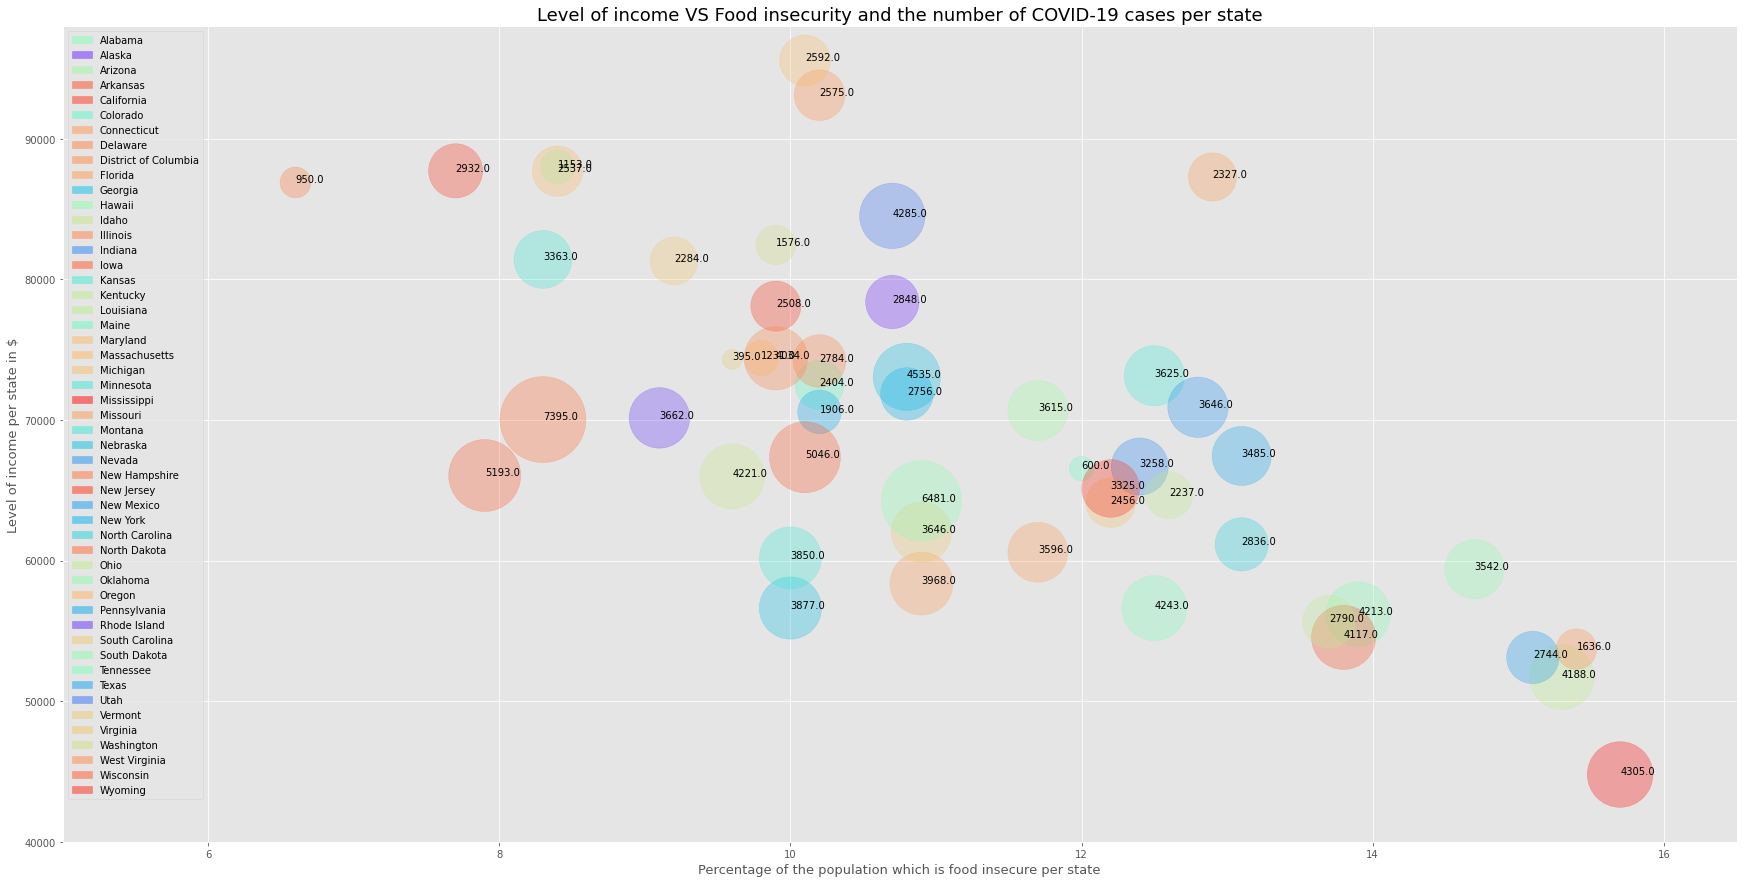

In [16]:
#we want to create a bubble chart displaying food insecurity VS level of income for each state 
#the size of the bubble will depend on the number of covid-19 cases

df3 = pd.DataFrame({
    "Level of food insecurity in %": food_data,
    "Level of income": income_data,
    "Bubble size": covid_data
})
#Choice of colours for each bubble
import matplotlib.cm as cm
import numpy as np
N=51
colors = cm.rainbow(np.random.rand(N))

#we plot our graph
plt.figure(figsize=(30,15))
plt.scatter("Level of food insecurity in %", "Level of income", s="Bubble size", alpha=0.3, data=df3, color=colors)

#we label the bubble
for i in range(N):
  plt.annotate(covid_data[i], xy=(food_data[i], income_data[i]))

#we legend the plot
import matplotlib.patches as mpatches
legend_list=[]
for i in range(N):
    legend_list.append(mpatches.Patch(color=colors[i], alpha=0.5, label=state_data[i]))

plt.legend(handles=legend_list)

#we define the range for x and y
plt.xlim(5, 16.5)
plt.ylim(40000,98000)

#we label our graph
plt.xlabel('Percentage of the population which is food insecure per state', size=13)
plt.ylabel('Level of income per state in $', size=13)
plt.title('Level of income VS Food insecurity and the number of COVID-19 cases per state', size=18)

#to plot this graph I used this https://datavizpyr.com/make-bubble-plot-in-python-with-matplotlib/ 

#to label and color the bubbles I used this https://stackoverflow.com/questions/35928486/bubble-chart-title-and-colors 

#for the legend I used https://www.youtube.com/watch?v=6fPBNp_XLxU 